## Life Expectancy (WHO)

**Coder**: Chanelle McLeod

**Goal**: Predict life expectancy.

**Source**: kaggle (https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who)

### Variables

1. `Life expectancy`: Life Expectancy in years
2. Country: Country
3. Year: year data collected
4. Status: Developed or Developing status
5. Adult Mortality: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
6. Infant deaths: Number of Infant Deaths per 1000 population
7. Alcohol: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
8. Percentage Expenditure: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
9. Hepatitis B: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
10. Measles: number of reported cases per 1000 population
11. BMI: Average Body Mass Index of entire population
12. Under-five deaths: Number of under-five deaths per 1000 population
13. Polio: Polio (Pol3) immunization coverage among 1-year-olds (%)
14. Total expenditure: General government expenditure on health as a percentage of total government expenditure (%)
15. Diphtheria: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
16. HIV/AIDS: Deaths per 1000 live births HIV/AIDS (0-4 years)
17. GDP: Gross Domestic Product per capita (in USD)
18. Population: Population of the country
19. Thinness 1-19 years: Prevalence of thinness among children and adolescents for Age 10 to 19 (%)
20. Thinness 5-9 years: Prevalence of thinness among children for Age 5 to 9 (%)
21. Income Composition of resources: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
22. Schooling: Number of years of Schooling (years)

### Load data

In [1]:
# Load libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load data
life_expectancy = pd.read_csv(r"C:\Users\owner\MC1 Labs\Lab data\Life Expectancy Data.csv")
life_expectancy_use = life_expectancy.copy()

## 1. Explore Data

In [3]:
# There's weird spacing so I will fix this
life_expectancy_use.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
life_expectancy_use = life_expectancy_use.rename(columns=lambda x: x.strip())

In [5]:
life_expectancy_use.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [6]:
life_expectancy_use.head(15)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [7]:
life_expectancy_use.shape

(2938, 22)

In [133]:
# Mean life expectancy is 69 years old
life_expectancy_use.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [51]:
life_expectancy_use.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

**There are some missing values and objects that can be encoded.**

<Axes: >

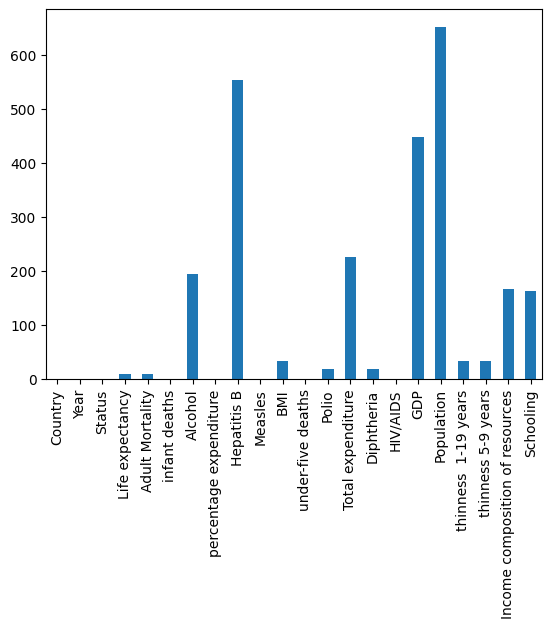

In [52]:
# I could try to impute some columns but last time it just took the median value
life_expectancy_use.isna().sum().plot(kind = "bar")

In [53]:
life_expectancy_use.Status.unique()

array(['Developing', 'Developed'], dtype=object)

In [54]:
life_expectancy_use.Year.unique()

array([2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005,
       2004, 2003, 2002, 2001, 2000], dtype=int64)

In [55]:
life_expectancy_use.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

<Axes: xlabel='Life expectancy', ylabel='Count'>

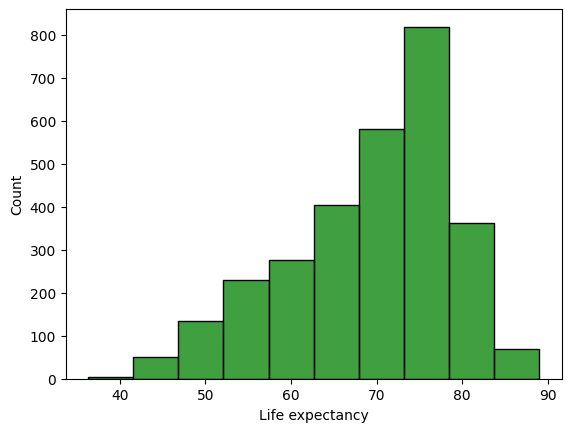

In [56]:
# The bar is left-skewed, the mean is pulled lower
sns.histplot(life_expectancy_use['Life expectancy'], bins = 10, color = 'g')

In [72]:
life_expectancy_use.groupby("Country")['Life expectancy'].mean().sort_values(ascending = False).nsmallest(10)

Country
Sierra Leone                46.11250
Central African Republic    48.51250
Lesotho                     48.78125
Angola                      49.01875
Malawi                      49.89375
Côte d'Ivoire               50.38750
Chad                        50.38750
Zimbabwe                    50.48750
Swaziland                   51.32500
Nigeria                     51.35625
Name: Life expectancy, dtype: float64

In [71]:
life_expectancy_use.groupby("Country")['Life expectancy'].mean().sort_values(ascending = True).nlargest(10)

Country
Japan          82.53750
Sweden         82.51875
Iceland        82.44375
Switzerland    82.33125
France         82.21875
Italy          82.18750
Spain          82.06875
Australia      81.81250
Norway         81.79375
Canada         81.68750
Name: Life expectancy, dtype: float64

## 2. Data Preparation

- Handle missing values
- Encode Country and Status
- Set data types

In [95]:
life_expectancy_transformed = life_expectancy_use.copy()

In [96]:
life_expectancy_transformed.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

### Handle missing values

In [97]:
# Forward fill values first
life_expectancy_transformed[['Alcohol','Total expenditure', 'GDP', 'Population', 'Income composition of resources', 'Schooling']] = life_expectancy_transformed.sort_values(['Country', 'Year']).groupby('Country')[['Alcohol','Total expenditure', 'GDP', 'Population', 'Income composition of resources', 'Schooling']].transform(lambda v: v.ffill())

In [98]:
life_expectancy_transformed.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                   47
Diphtheria                          19
HIV/AIDS                             0
GDP                                431
Population                         648
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [99]:
# Now try taking the mean of each country's values
life_expectancy_transformed[['Alcohol','Total expenditure', 'GDP', 'Population', 'Income composition of resources', 'Schooling']] = life_expectancy_transformed[['Alcohol','Total expenditure', 'GDP', 'Population', 'Income composition of resources', 'Schooling']].fillna(life_expectancy_transformed.groupby('Country')[['Alcohol','Total expenditure', 'GDP', 'Population', 'Income composition of resources', 'Schooling']].transform('mean'))

In [100]:
life_expectancy_transformed.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                             17
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                   32
Diphtheria                          19
HIV/AIDS                             0
GDP                                405
Population                         648
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [104]:
# Finally remove all missing rows
life_expectancy_transformed = life_expectancy_transformed.dropna(axis = 0)
life_expectancy_transformed.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

### Encode Country and Status

In [106]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

life_expectancy_encoded = life_expectancy_transformed.copy()

life_expectancy_encoded['Country_encoded'] = label_encoder.fit_transform(life_expectancy_transformed['Country'])
life_expectancy_encoded['Status_encoded'] = label_encoder.fit_transform(life_expectancy_transformed['Status'])

life_expectancy_encoded.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country_encoded,Status_encoded
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


### Final dataframe

In [108]:
life_expectancy_final = life_expectancy_encoded[['Life expectancy', 'Year', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Country_encoded', 'Status_encoded']]

## 3. Feature Engineering

In [131]:
X = life_expectancy_final.iloc[:, 1:]
y = life_expectancy_final.iloc[:, 0]
X.columns

Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Country_encoded', 'Status_encoded'],
      dtype='object')

### Scaling data

In [141]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create the scaler
scaler = StandardScaler()

# Subset the DataFrame you want to scale 
# I did not scale other columns because they are already scaled
X_subset = X[["GDP", "Population", "Schooling"]]

# Apply the scaler
X_subset_scaled = scaler.fit_transform(X_subset)
X.loc[:, ["GDP", "Population", "Schooling"]] = X_subset_scaled

In [145]:
X

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country_encoded,Status_encoded
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,65.0,0.1,-0.438907,0.284676,17.2,17.3,0.479,-0.724982,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,62.0,0.1,-0.436398,-0.206434,17.5,17.5,0.476,-0.760562,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,64.0,0.1,-0.434718,0.255205,17.7,17.7,0.470,-0.796141,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,67.0,0.1,-0.431347,-0.156904,17.9,18.0,0.463,-0.831721,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,68.0,0.1,-0.484841,-0.167464,18.2,18.2,0.454,-0.938460,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,...,65.0,33.6,-0.450365,-0.023420,9.4,9.4,0.407,-1.045200,132,1
2934,2003,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,...,68.0,36.7,-0.450454,-0.025532,9.8,9.9,0.418,-0.938460,132,1
2935,2002,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,...,71.0,39.8,-0.485387,-0.209404,1.2,1.3,0.427,-0.760562,132,1
2936,2001,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,...,75.0,42.1,-0.442053,-0.029467,1.6,1.7,0.427,-0.831721,132,1


In [159]:
# Recursive Feature Engineering

from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

# Initialize and define the RFE model
RFE = RFE(dtr, n_features_to_select = 15) # number of featuers

# Fit and Transform data using RFE
x_RFE = RFE.fit_transform(X, y)  

#Fitting the data to model
print(RFE.support_)
print(RFE.ranking_)

[ True  True False  True False False False  True  True False  True  True
  True  True  True  True  True  True  True  True False]
[1 1 4 1 2 6 3 1 1 5 1 1 1 1 1 1 1 1 1 1 7]


In [162]:
X.columns

Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria',
       'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Country_encoded', 'Status_encoded'],
      dtype='object')

In [163]:
X_final = X.iloc[:, [0, 1, 3, 6, 7, 8, 10, 12, 13, 14, 15, 16, 17, 18, 19]]

In [165]:
X_final.head()

,Year,Adult Mortality,Alcohol,Measles,BMI,under-five deaths,Total expenditure,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Country_encoded
0,2015,263.0,0.01,1154,19.1,83,8.16,0.1,-0.438907,0.284676,17.2,17.3,0.479,-0.724982,0
1,2014,271.0,0.01,492,18.6,86,8.18,0.1,-0.436398,-0.206434,17.5,17.5,0.476,-0.760562,0
2,2013,268.0,0.01,430,18.1,89,8.13,0.1,-0.434718,0.255205,17.7,17.7,0.470,-0.796141,0
3,2012,272.0,0.01,2787,17.6,93,8.52,0.1,-0.431347,-0.156904,17.9,18.0,0.463,-0.831721,0
4,2011,275.0,0.01,3013,17.2,97,7.87,0.1,-0.484841,-0.167464,18.2,18.2,0.454,-0.938460,0


## 4. Complete Regression Models

### Train and test data

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.3, random_state=8)

### Multivariate Regression

In [172]:
from sklearn.linear_model import LinearRegression

#Create the model :
regressor = LinearRegression()

#Train the model :
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

In [174]:
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_results.head(10)

,Actual,Predicted
1203,68.9,70.266836
278,58.4,62.174772
2503,47.1,37.528776
1975,62.9,64.095140
2447,71.8,71.163221
595,62.5,64.818234
343,57.5,59.652040
1117,65.1,66.929166
487,54.2,57.213860
873,74.2,75.423345


In [194]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error:
root_mse = np.sqrt(mse)

#R_squared : 
R_squared = r2_score(y_test, y_pred)


print("Root Mean Square Error: ", root_mse)
print("R^2 Value in %:              ", R_squared*100)

Root Mean Square Error:  3.845531974306263
R^2 Value in %:               80.70364403107922


### Polynomial Regression 2

In [195]:
from sklearn.preprocessing import PolynomialFeatures

# define features for ploynomial 2nd degree
poly_2nd = PolynomialFeatures(degree=2)
x_poly2 = poly_2nd.fit_transform(X)

# define model and fit and predict
poly2_model = LinearRegression()
poly2_model.fit(x_poly2, y)
y_pred_poly2 = poly2_model.predict(x_poly2)

In [198]:
# Root Mean Squared Error:
poly2_rmse = np.sqrt(mean_squared_error(y, y_pred_poly2))

#R_squared : 
poly2_r2 = r2_score(y, y_pred_poly2)

print("Root Mean Square Error: ", poly2_rmse)
print("R^2 Value in %:              ", poly2_r2*100)

Root Mean Square Error:  2.123810561836006
R^2 Value in %:               94.06386244422279


### Polynomial Regression 3

In [199]:
from sklearn.preprocessing import PolynomialFeatures

# define features for ploynomial 3rd degree
poly_3nd = PolynomialFeatures(degree=3)
x_poly3 = poly_3nd.fit_transform(X)

# define model and fit and predict
poly3_model = LinearRegression()
poly3_model.fit(x_poly3, y)
y_pred_poly3 = poly3_model.predict(x_poly3)

In [200]:
# Root Mean Squared Error:
poly3_rmse = np.sqrt(mean_squared_error(y,y_pred_poly3))

#R_squared : 
poly3_r2 = r2_score(y, y_pred_poly3)

print("Root Mean Square Error: ", poly3_rmse)
print("R^2 Value in %:              ", poly3_r2*100)

Root Mean Square Error:  0.385050394712139
R^2 Value in %:               99.8048774111527


### Decision Tree Regression

In [221]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Create a Decision Tree Regressor
dtr = DecisionTreeRegressor()

# Define the hyperparameters and their possible ranges for tuning
param_dist = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None] + list(np.arange(10, 31, 10)),
    'min_samples_split': list(np.arange(2, 11)),
    'min_samples_leaf': list(np.arange(1, 5))
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(dtc, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)

# Fit the model to the data
random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)
print("R^2:", random_search.best_score_)

Best Hyperparameters: {'splitter': 'best', 'min_samples_split': 9, 'min_samples_leaf': 4, 'max_depth': 30, 'criterion': 'absolute_error'}
R^2: 0.9146001598604228


In [213]:
dtr_final = DecisionTreeRegressor(criterion = 'poisson',
                                  splitter = 'best',
                                  min_samples_split = 7,
                                  min_samples_leaf = 3,
                                  max_depth = 30)

# Fit the model to the data
dtr_final.fit(X_train, y_train)

dtc_y_pred = dtr_final.predict(X_test)

In [222]:
mse = mean_squared_error(y_test, dtc_y_pred)

# Root Mean Squared Error:
root_mse = np.sqrt(mse)

#R_squared : 
R_squared = r2_score(y_test, dtc_y_pred)


print("Root Mean Square Error: ", root_mse)
print("R^2 Value in %:              ", R_squared*100)

Root Mean Square Error:  2.5513186098847993
R^2 Value in %:               91.50639925333722


### Random Forest Regression

In [226]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Create a Decision Tree Regressor
rfr = RandomForestRegressor()

# Define the hyperparameters and their possible ranges for tuning
param_dist = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth': [None] + list(np.arange(10, 31, 10)),
    'min_samples_split': list(np.arange(2, 11)),
    'min_samples_leaf': list(np.arange(1, 5))
}

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(rfr, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2', random_state=42)

# Fit the model to the data
random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)
print("R^2:", random_search.best_score_)

Best Hyperparameters: {'min_samples_split': 3, 'min_samples_leaf': 2, 'max_depth': 30, 'criterion': 'squared_error'}
R^2: 0.9519636525823678


In [227]:
rfr_final = RandomForestRegressor(criterion = 'squared_error',
                                  min_samples_split = 3,
                                  min_samples_leaf = 2,
                                  max_depth = 30)

# Fit the model to the data
rfr_final.fit(X_train, y_train)

rfr_y_pred = rfr_final.predict(X_test)

In [228]:
mse = mean_squared_error(y_test, rfr_y_pred)

# Root Mean Squared Error:
root_mse = np.sqrt(mse)

#R_squared : 
R_squared = r2_score(y_test, rfr_y_pred)


print("Root Mean Square Error: ", root_mse)
print("R^2 Value in %:              ", R_squared*100)

Root Mean Square Error:  1.9305249567880731
R^2 Value in %:               95.13689899993494


## 5. Model Selection

The model I recommend using is the `random forest classification model` because it had the second highest R^2 score and RMSE of 95.1% and 1.93, respectively. I did not select the third degree polynomial because of it's 99% R^2 value which will likely overfit unseen data.